# Unidad 1. Análisis Exploratorio

### Problemática

**¿Qué factores personales y comportamentales se relacionan con los ingresos individuales en la región Pampeana?**

Este análisis busca explorar variables como el sexo, la edad y el nivel educativo, así como ciertas prácticas financieras del hogar (pedir préstamos, comprar en cuotas o al fiado), se asocian con el nivel de ingreso declarado por las personas.

Se eligió la región Pampeana porque representa una parte importante de la población del país y muestra una gran diversidad en términos sociales y económicos. Además, algunos integrantes del grupo residen en esta región, por lo que también resulta relevante desde lo personal.

---

### Variables seleccionadas

| Columna  | Variable                  | Tipo de variable       | Fuente (tabla)    |
|----------|---------------------------|------------------------|-------------------|
| P47T     | Ingreso individual        | Cuantitativa continua  | Base individual   |
| CH06     | Edad                      | Cuantitativa continua  | Base individual   |
| CH05     | Fecha de nacimiento       | Cuantitativa continua  | Base individual   |
| CH04     | Sexo                      | Cualitativa nominal    | Base individual   |
| NIVEL_ED | Nivel educativo           | Cualitativa ordinal    | Base individual   |
| ESTADO   | Estado actividad          | Cualitativa nominal    | Base individual   |
| V16      | Compra en cuotas o fiado  | Cualitativa nominal    | Base de hogares   |
| V15      | Préstamo banco            | Cualitativa nominal    | Base de hogares   |
| V14      | Préstamo personas         | Cualitativa nominal    | Base de hogares   |

---

### Población y muestra

Se utilizaron los datos de la Encuesta Permanente de Hogares (EPH) correspondientes al tercer trimestre de 2024. Para este análisis, se combinaron dos bases: personas** y hogares, unidas mediante los identificadores comúnes presente en ambas tablas (número de hogar y componente).

Este trabajo se basa en los datos provistos por la Encuesta Permanente de Hogares (EPH) correspondientes al tercer trimestre de 2024. Para este análisis se utilizaron tanto la base de datos de personas (individual) como la base de hogares, que fueron solapadas mediante el identificador común presente en ambas tablas (número de hogar y componente).

La población total a la que pertenecen estos datos es la población residente en la República Argentina, de acuerdo a la cobertura de la EPH. Esta población incluye tanto a personas económicamente activas como inactivas, y contempla diversos niveles educativos, edades y situaciones familiares.

Para el análisis se realizó un recorte geográfico, tomando únicamente los hogares y personas correspondientes a la región Pampeana, que abarca aglomerados urbanos en las provincias de Buenos Aires, Córdoba, Santa Fe, Entre Ríos y La Pampa. Elegimos esta región porque representa una parte muy importante de la población del país y tiene mucha variedad en cuanto a situaciones sociales y económicas. Esto nos permite analizar distintos casos dentro de una misma zona.

La muestra analizada se compone de personas con ingresos individuales declarados, que además cuentan con información sobre sexo, edad, nivel educativo, y variables asociadas al comportamiento económico del hogar, como la compra en cuotas, al fiado, o el acceso a préstamos. Este enfoque permitió estudiar relaciones entre los ingresos individuales y diversas características sociodemográficas y de consumo dentro de la región Pampeana.

---

### Diagrama: Relación entre tablas y variables

![Distribución de variables en Hogares y Personas](der.png)

---
### Carga, filtrado y preparación de la base

Los pasos son los siguientes:

1. Se cargan las bases originales de la Encuesta Permanente de Hogares.

2. Se renombran las columnas principales para que tengan nombres más claros y fáciles de usar.

3. Se filtran los registros para quedarnos solo con los casos de la región Pampeana (código 43).

4. Se seleccionan solamente las columnas que se van a utilizar en el análisis.

5. Se filtran las personas que no declararon ingreso, ya que no aportan al objetivo del análisis.

6. Se combinan las dos bases (personas y hogares) usando los identificadores comunes de vivienda y hogar.

7. Por último, se guarda la base ya procesada en un archivo .csv. Esto permite trabajar directamente con ese archivo más adelante, sin tener que repetir todos los pasos anteriores.

---

## Librerias

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

## Cargamos las bases

In [38]:
hogares = pd.read_excel("usu_hogar_T324.xlsx")
personas = pd.read_excel("usu_individual_T324.xlsx")

## Renombramos columnas con nombres más intuitivos 

In [39]:
# Renombramos columnas de personas
renombrar_personas = {
    "CH04": "sexo",
    "CH05": "fecha_nacimiento",
    "CH06": "edad",
    "P47T": "ingreso",
    "NIVEL_ED": "nivel_educativo",
    "ESTADO": "estado_actividad",
    "CODUSU": "id_vivienda",
    "NRO_HOGAR": "id_hogar",
    "REGION": "region"
}
personas.rename(columns=renombrar_personas, inplace=True)

# Renombramos columnas de hogares
renombrar_hogares = {
    "V14": "prestamo_personas",
    "V15": "prestamo_banco",
    "V16": "compra_cuotas",
    "CODUSU": "id_vivienda",
    "NRO_HOGAR": "id_hogar",
    "REGION": "region"
}
hogares.rename(columns=renombrar_hogares, inplace=True)

## Filtramos por región Pampeana

In [40]:
# Filtramos la region pampeana en ambas bases
personas_fil_pam = personas[personas['region'] == 43]
hogares_fil_pam = hogares[hogares['region'] == 43]

## Seleccionamos las columnas relevantes

In [41]:
# Filtramos las columnas necesarias en ambas bases
personas_fil_pam = personas_fil_pam[['id_vivienda', 'id_hogar', 'sexo', 'edad', 'nivel_educativo', 'ingreso']]
hogares_fil_pam = hogares_fil_pam[['id_vivienda', 'id_hogar', 'prestamo_personas', 'prestamo_banco', 'compra_cuotas']]


## Filtramos los que tienen ingresos

In [42]:
# Filtrar personas con ingreso válido ANTES del merge
personas_fil_pam = personas_fil_pam[personas_fil_pam['ingreso'] > 0]


## Unimos las dos bases y exportamos el resultado

In [43]:

# Merge entre personas y hogares
df_final = pd.merge(personas_fil_pam, hogares_fil_pam, on=['id_vivienda', 'id_hogar'], how='inner')
df_final.to_csv('base_pampeana_analizada.csv', index=False)

---
# Inspección general de la base

In [44]:
# Ver estructura de la base
df_final.info()

# Ver las primeras filas
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7128 entries, 0 to 7127
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_vivienda        7128 non-null   object 
 1   id_hogar           7128 non-null   int64  
 2   sexo               7128 non-null   int64  
 3   edad               7128 non-null   int64  
 4   nivel_educativo    7128 non-null   int64  
 5   ingreso            7128 non-null   float64
 6   prestamo_personas  7128 non-null   int64  
 7   prestamo_banco     7128 non-null   int64  
 8   compra_cuotas      7128 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 501.3+ KB


,id_vivienda,id_hogar,sexo,edad,nivel_educativo,ingreso,prestamo_personas,prestamo_banco,compra_cuotas
0,TQRMNOQPRHKLKNCDEFJAH00868631,1,1,81,6,1750000.0,2,2,2
1,TQRMNOQPRHKLKNCDEFJAH00868631,1,2,78,6,400000.0,2,2,2
2,TQRMNORVXHKLKNCDEFJAH00868632,1,1,65,4,1200000.0,2,1,1
3,TQRMNORVXHKLKNCDEFJAH00868632,1,2,66,4,435600.0,2,1,1
4,TQRMNORVXHKLKNCDEFJAH00868632,1,1,30,5,1125000.0,2,1,1


Una vez construida la base final, se revisó su estructura para conocer cuántos registros tenía y verificar que no hubiera valores faltantes en las variables seleccionadas.

La base quedó compuesta por 7128 personas de la región Pampeana, con información completa para todas las variables relevantes.

---

## Análisis de la variable ingreso

In [45]:
df_final['ingreso'].describe()

count    7.128000e+03
mean     5.926108e+05
std      5.589330e+05
min      6.000000e+03
25%      2.700000e+05
50%      4.390000e+05
75%      7.962500e+05
max      1.237000e+07
Name: ingreso, dtype: float64

- La variable ingreso muestra una gran dispersión. La desviación estándar es alta y similar al valor promedio, lo que indica mucha variación entre personas.

- El ingreso mínimo es muy bajo, mientras que el 25% de las personas gana menos de 270.000 pesos. La mitad gana menos de 439.000, y solo el 25% supera los 796.250.

- El promedio es más alto que la mediana, lo que sugiere la presencia de valores extremos, como un caso que supera los 12 millones.

- La diferencia entre el percentil 75 y el ingreso máximo es muy grande, lo que confirma que hay una cola larga hacia la derecha en la distribución.

### Eliminación de outliers en la variable ingreso

La variable ingreso tiene valores muy altos que pueden distorsionar los resultados y los gráficos.

Por eso se decidió eliminar el 1% de los casos con ingresos más altos (a partir del percentil 99), para poder trabajar con una muestra más representativa de la mayoría de las personas.


In [46]:
# Calcular el percentil 99
p99 = df_final['ingreso'].quantile(0.99)

# Filtrar el dataframe sin los ingresos más altos (top 1%)
df_sin_outliers = df_final[df_final['ingreso'] <= p99]


### Distribución del ingreso individual

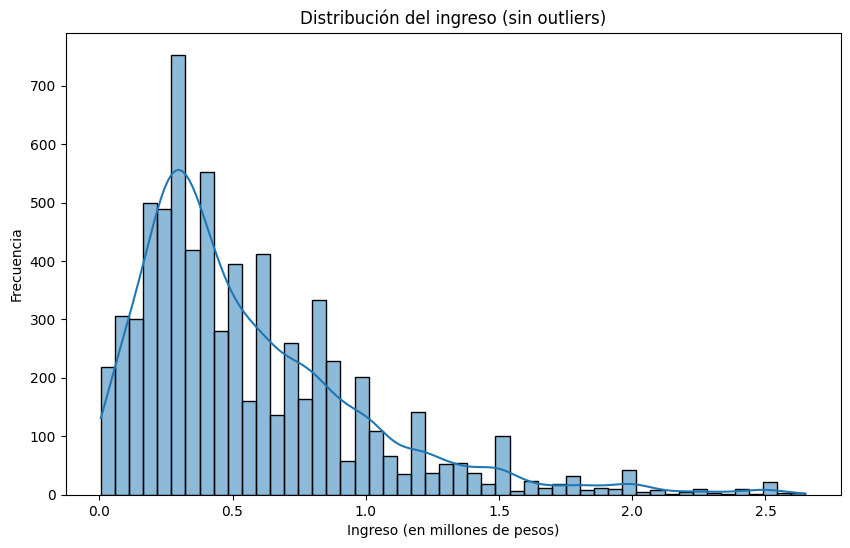

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_outliers['ingreso'] / 1_000_000, bins=50, kde=True)
plt.title("Distribución del ingreso (sin outliers)")
plt.xlabel("Ingreso (en millones de pesos)")
plt.ylabel("Frecuencia")
plt.show()



El gráfico muestra que la mayoría de las personas tienen ingresos bajos o medios. A medida que el ingreso sube, hay menos casos. Aunque se eliminaron los valores más altos, la distribución sigue siendo desigual y con más valores en el extremo bajo.

---

## Análisis de la variable sexo

/tmp/ipykernel_6431/638770969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['sexo'] = df_sin_outliers['sexo'].replace({1: 'Varón', 2: 'Mujer'})


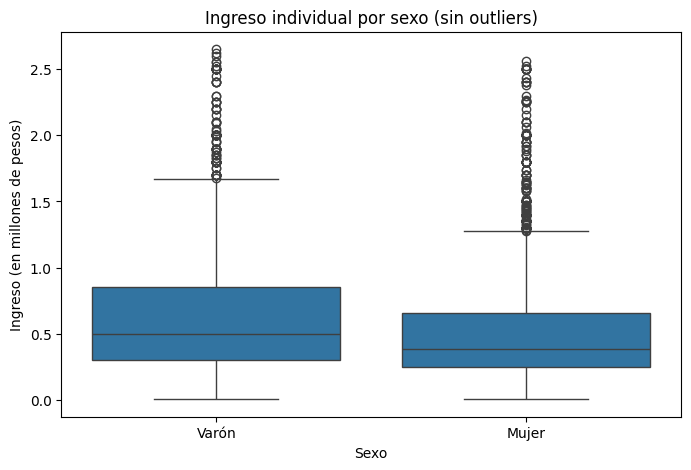

In [48]:
# Reemplazar los códigos por etiquetas
df_sin_outliers['sexo'] = df_sin_outliers['sexo'].replace({1: 'Varón', 2: 'Mujer'})

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sin_outliers, x='sexo', y=df_sin_outliers['ingreso'] / 1_000_000)
plt.title("Ingreso individual por sexo (sin outliers)")
plt.xlabel("Sexo")
plt.ylabel("Ingreso (en millones de pesos)")
plt.show()


Se compararon los ingresos entre varones y mujeres. En promedio, los varones ganan más.

El gráfico muestra que en ambos casos hay mucha diferencia entre los ingresos, pero en general las mujeres se concentran en los niveles más bajos.

---

## Análisis del ingreso según nivel educativo

In [49]:
# Mapeo oficial de niveles educativos según EPH
niveles_educativos = {
    1: "Primario incompleto (incluye educación especial)",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario completo",
    5: "Superior universitario incompleto",
    6: "Superior universitario completo",
    7: "Sin instrucción",
    9: "Ns/Nr"
}

# Aplicar el mapeo
df_sin_outliers['nivel_educativo'] = df_sin_outliers['nivel_educativo'].replace(niveles_educativos)

# Definir el orden lógico de los niveles
orden_niveles = [
    "Sin instrucción",
    "Primario incompleto (incluye educación especial)",
    "Primario completo",
    "Secundario incompleto",
    "Secundario completo",
    "Superior universitario incompleto",
    "Superior universitario completo"
]

# Convertir la columna a categoría ordenada
df_sin_outliers['nivel_educativo'] = pd.Categorical(
    df_sin_outliers['nivel_educativo'],
    categories=orden_niveles,
    ordered=True
)

/tmp/ipykernel_6431/2698868041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['nivel_educativo'] = df_sin_outliers['nivel_educativo'].replace(niveles_educativos)
/tmp/ipykernel_6431/2698868041.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['nivel_educativo'] = pd.Categorical(


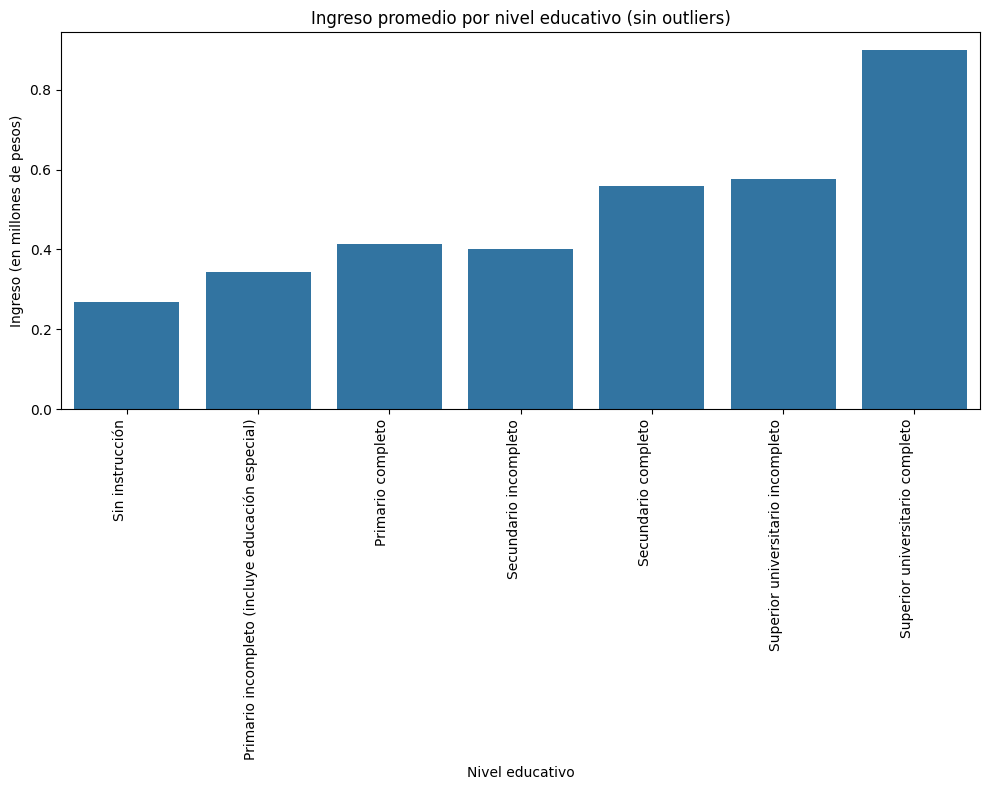

In [51]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_sin_outliers,
    x='nivel_educativo',
    y=df_sin_outliers['ingreso'] / 1_000_000,
    estimator=np.mean,
    errorbar=None  # Sin barras de error
)
plt.xticks(rotation=90, ha='right')
plt.title("Ingreso promedio por nivel educativo (sin outliers)")
plt.xlabel("Nivel educativo")
plt.ylabel("Ingreso (en millones de pesos)")
plt.tight_layout()
plt.show()


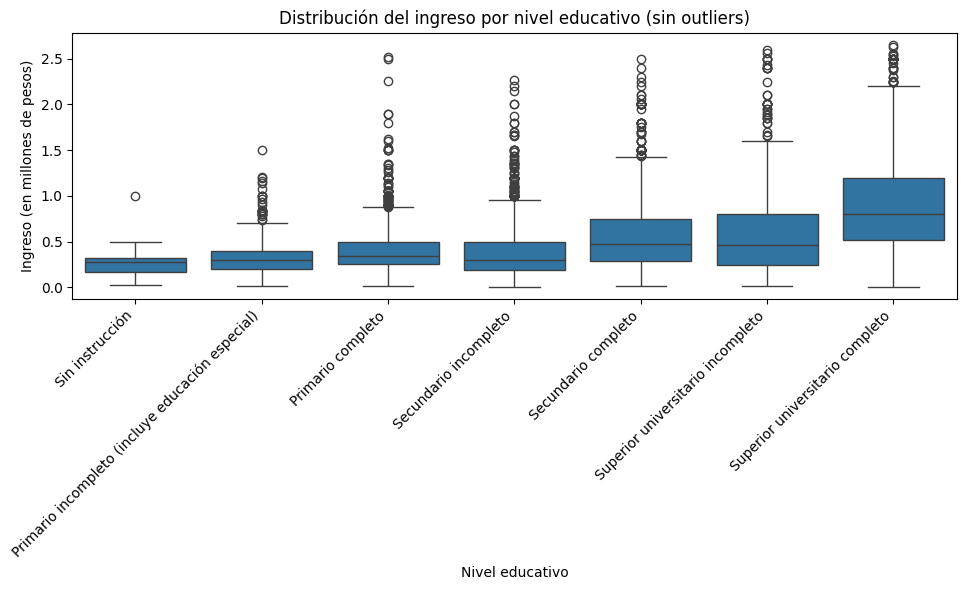

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_sin_outliers,
    x='nivel_educativo',
    y=df_sin_outliers['ingreso'] / 1_000_000
)
plt.xticks(rotation=45, ha='right')
plt.title("Distribución del ingreso por nivel educativo (sin outliers)")
plt.xlabel("Nivel educativo")
plt.ylabel("Ingreso (en millones de pesos)")
plt.tight_layout()
plt.show()
